# Keypoint detection

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.6/609.6 kB 9.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import cv2
import os
from ultralytics import YOLO
from collections import defaultdict
from google.colab.patches import cv2_imshow
import time
import matplotlib.pyplot as plt
import numpy as np
import shutil

In [ ]:
!curl -L -C - -o 'config.yaml' 'https://drive.google.com/u/0/uc?id=1AUk_lGf35zYX8wsX9TcDnL6wpF7oGI-z&export=download&confirm=t' # config.yaml
# https://drive.google.com/file/d/1AUk_lGf35zYX8wsX9TcDnL6wpF7oGI-z/view?usp=drive_link

!curl -L -C - -o 'test_data.zip' 'https://drive.google.com/u/0/uc?id=1kV_wtm1zyWLSFQIDKyGCnJ8x1KYMmJJb&export=download&confirm=t' # test_data.zip
# https://drive.google.com/file/d/1kV_wtm1zyWLSFQIDKyGCnJ8x1KYMmJJb/view?usp=drive_link

!curl -L -C - -o 'data.zip' 'https://drive.google.com/u/0/uc?id=1T3FncKCA52Kruc2L8jSTu4k05i4icpMF&export=download&confirm=t' # data.zip
# https://drive.google.com/file/d/1T3FncKCA52Kruc2L8jSTu4k05i4icpMF/view?usp=drive_link

!curl -L -C - -o 'runs300448.zip' 'https://drive.google.com/u/0/uc?id=1l-uIRiWLQ3oOcUCtaAUdr_uBE-E1JZVC&export=download&confirm=t' # runs.zip
# https://drive.google.com/file/d/1l-uIRiWLQ3oOcUCtaAUdr_uBE-E1JZVC/view?usp=drive_link

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   360  100   360    0     0    503      0 --:--:-- --:--:-- --:--:--   503
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
100 15.9M  100 15.9M    0     0  3682k      0  0:00:04  0:00:04 --:--:-- 3682k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:

In [ ]:
!unzip -n data.zip
!unzip -n test_data.zip
!unzip -n runs300448.zip

Archive:  data.zip
   creating: data/images/
   creating: data/images/train/
  inflating: data/images/train/VCX_s0000010_i1_PA.jpg  
  inflating: data/images/train/VCX_s0000020_i1_PA.jpg  
  inflating: data/images/train/VCX_s0000030_i1_PA.jpg  
  inflating: data/images/train/VCX_s0000040_i1_PA.jpg  
  inflating: data/images/train/VCX_s0000050_i1_PA.jpg  
  inflating: data/images/train/VCX_s0000060_i1_PA.jpg  
  inflating: data/images/train/VCX_s0000070_i1_PA.jpg  
  inflating: data/images/train/VCX_s0000080_i1_PA.jpg  
  inflating: data/images/train/VCX_s0000090_i1_PA.jpg  
  inflating: data/images/train/VCX_s0000100_i1_PA.jpg  
  inflating: data/images/train/VCX_s0000111_i1_PA.jpg  
  inflating: data/images/train/VCX_s0000120_i1_PA.jpg  
  inflating: data/images/train/VCX_s0000487_i4_PA.jpg  
  inflating: data/images/train/VCX_s0000488_i1_PA.jpg  
  inflating: data/images/train/VCX_s0000489_i1_PA.jpg  
  inflating: data/images/train/VCX_s0000490_i1_PA.jpg  
  inflating: data/images/tr

In [ ]:
# Specify the path to the directories containing the images
directories = ["/content/data/images/train", "/content/data/images/val", "/content/test_data/images"]

# Create a dictionary to store the count of each shape
shape_counts = defaultdict(int)

for directory in directories:
  print("Length of", directory, len(os.listdir(directory)))
  # Iterate over each file in each directory
  for filename in os.listdir(directory):
      # Construct the full file path
      file_path = os.path.join(directory, filename)

      # Load the image using OpenCV
      img = cv2.imread(file_path)

      # Get the shape of the image
      shape = img.shape

      # Increment the count for the corresponding shape
      shape_counts[shape] += 1

# Print the count of each shape
for shape, count in shape_counts.items():
    print("Shape:", shape, "Count:", count)

Length of /content/data/images/train 1552
Length of /content/data/images/val 333
Length of /content/test_data/images 333
Shape: (448, 448, 3) Count: 2218


In [ ]:
def save_model():
  # Specify the path to the folder you want to download
  folder_path = "/content/runs"

  # Specify the path and filename for the resulting zip file
  zip_filename = "/content/runs.zip"

  # Create a zip file of the folder
  shutil.make_archive("/content/runs", 'zip', folder_path)

  # Download the zip file
  from google.colab import files
  files.download(zip_filename)

In [ ]:
# New training
# model = YOLO('yolov8n-pose.pt')  # load a pretrained model (recommended for training)
# model.train(data='/content/config.yaml', epochs=300, imgsz=448)
# save_model()

# Loading an already trained model
model_path = '/content/pose/train/weights/best.pt'
model = YOLO(model_path)

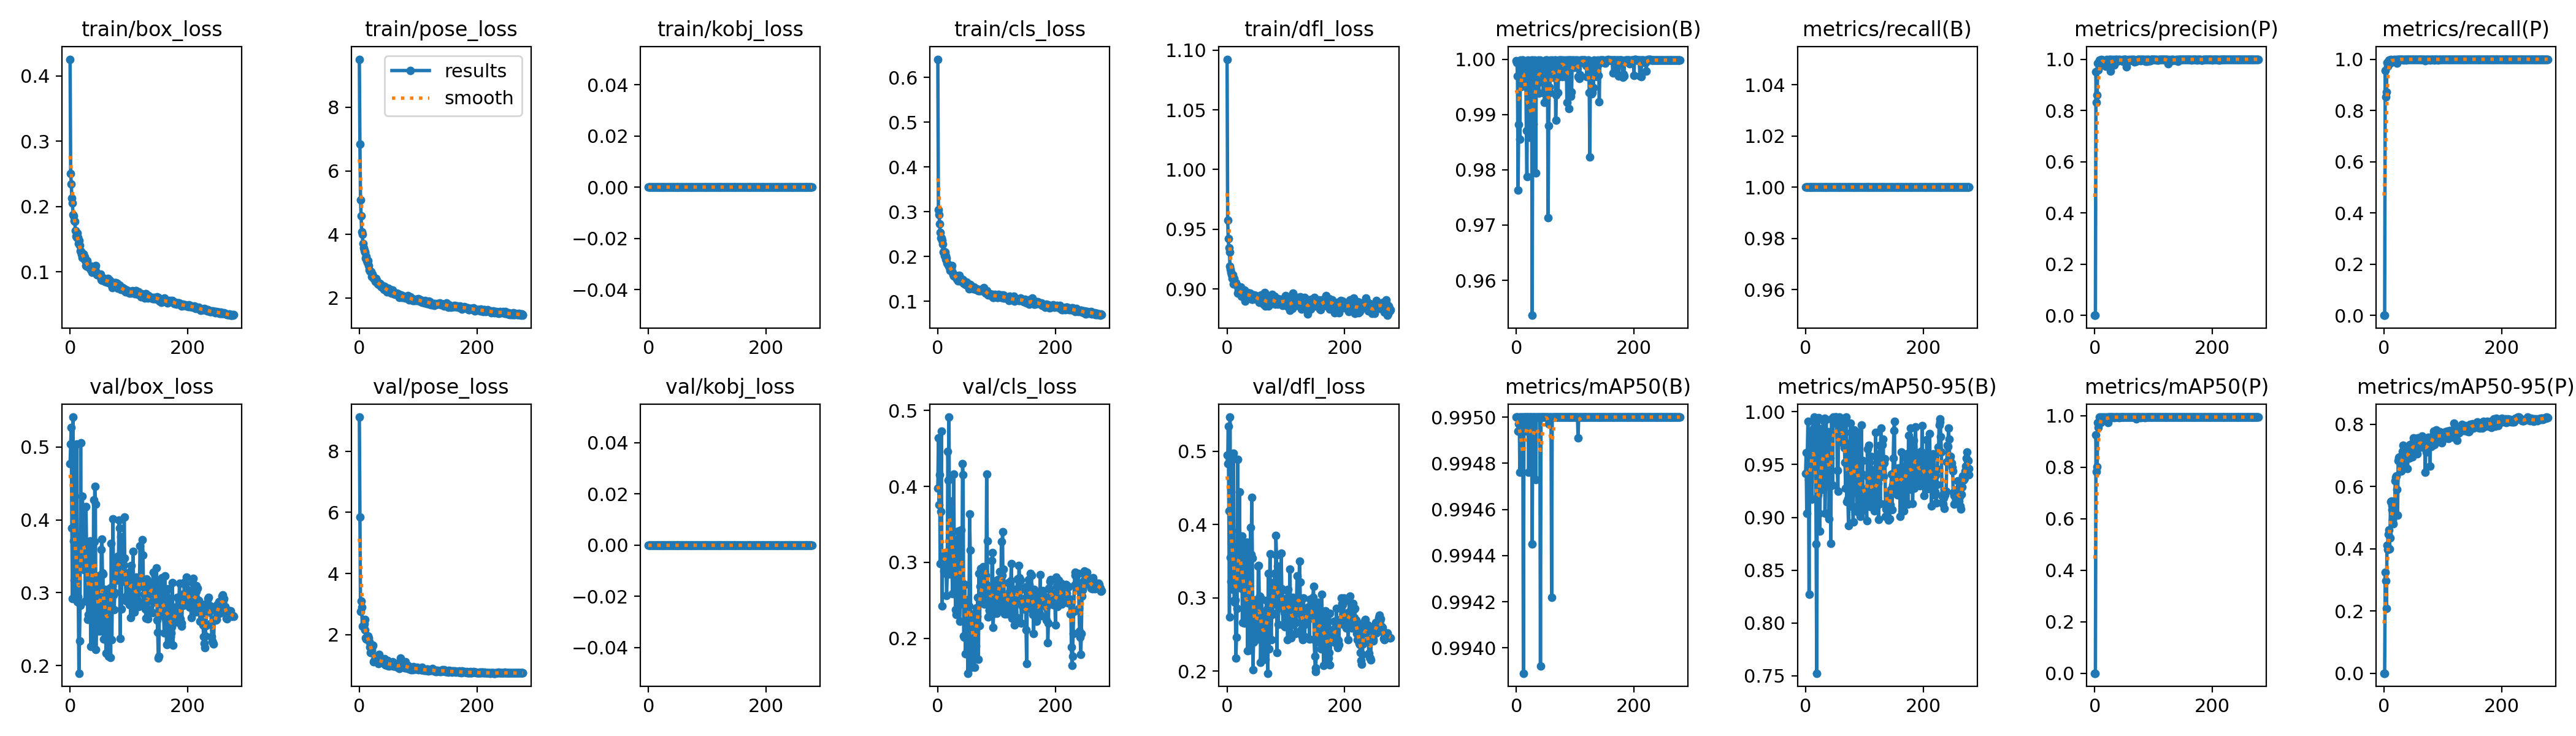

In [ ]:
# Train and val pose loss

# img_path = "/content/runs/pose/train/results.png" # newly trained model
img_path = "/content/pose/train/results.png" # loaded model
img = cv2.imread(img_path)
cv2_imshow(img)

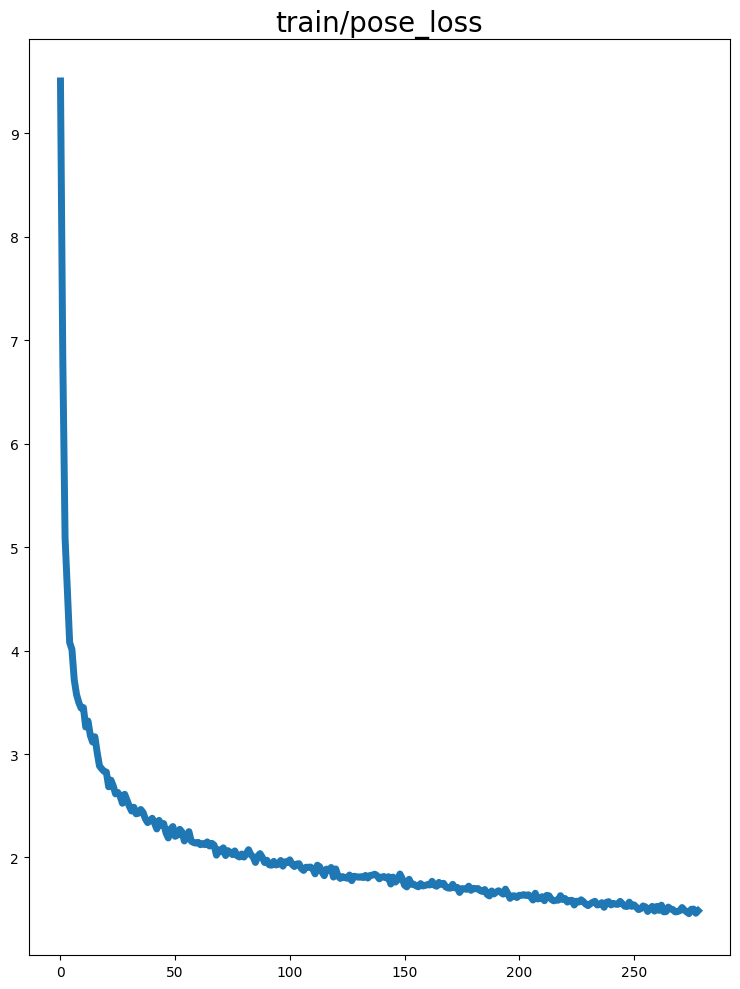

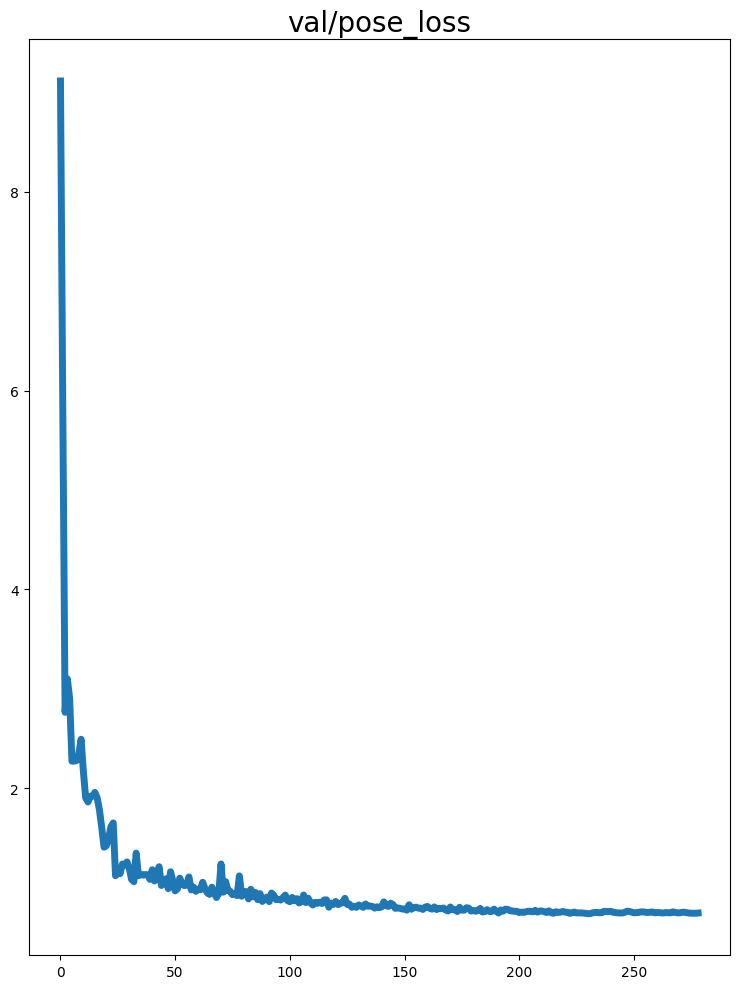

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 10.00]
plt.rcParams["figure.autolayout"] = True
df = pd.read_csv("/content/pose/train/results.csv")
# print(df.columns)
plt.plot(df.loc[:, '                  epoch'], df.loc[:, '        train/pose_loss'], linewidth=5)
plt.title('train/pose_loss', fontsize=20)
plt.show()
plt.figure()
plt.plot(df.loc[:, '                  epoch'], df.loc[:, '          val/pose_loss'], linewidth=5)
plt.title('val/pose_loss', fontsize=20)
plt.show()

In [ ]:
# Train accuracy
!yolo val model=/content/pose/train/weights/best.pt data=/content/config.yaml split=train # loaded model

# Valid accuracy
!yolo val model=/content/pose/train/weights/best.pt data=/content/config.yaml split=val # loaded model

# Test accuracy
!yolo val model=/content/pose/train/weights/best.pt data=/content/config.yaml split=test # loaded model

Ultralytics YOLOv8.0.142 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-pose summary (fused): 187 layers, 3215483 parameters, 0 gradients
100% 755k/755k [00:00<00:00, 108MB/s]
val: Scanning /content/data/labels/train... 1552 images, 0 backgrounds, 0 corrupt: 100% 1552/1552 [00:00<00:00, 1575.14it/s]
val: New cache created: /content/data/labels/train.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100% 97/97 [00:22<00:00,  4.28it/s]
                   all       1552       1552          1          1      0.995      0.993          1          1      0.995      0.819
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/pose/val
Ultralytics YOLOv8.0.142 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-pose summary (fused): 187 layers, 3215483 parameters, 0 gradients
val: Scanning /content/data/labels/val... 

In [ ]:
def truth_labels(filename, directory):
  # Specify the path to the directory containing the text files
  file_path = os.path.join(directory, os.path.splitext(filename)[0] + ".txt")

  # Read the contents of the text file
  with open(file_path, 'r') as f:
      lines = f.readlines()

  # Extract the coordinates
  coordinates = []
  for line in lines:
      # Split the line into individual values
      values = line.strip().split()

      # Check if the line has the expected number of values (45 in this case)
      if len(values) == 45:
          # Extract the coordinates (last 40 values)
          coords = [float(val) for val in values[5:]]
          coordinates.append(coords)

  return coordinates

In [ ]:
def calculate_nme(NMEs, dataset):
  print("NME statistics for", dataset, "data")

  # Average NME
  print("Average NME:", format(np.mean(NMEs),".3f"))

  # Median NME
  print("Median NME:", format(np.median(NMEs),".3f"))

  # Min NME
  print("Min NME:", format(np.min(NMEs),".3f"))

  # Max NME
  print("Max NME:", format(np.max(NMEs),".3f"), "\n")

In [ ]:
# Calculate NME on training and validationd datasets

model_path = '/content/pose/train/weights/best.pt' # loaded model

folders = ["train", "val"]

img_path = "/content/data/images/"
label_path = "/content/data/labels/"

rezults = []

for folder in folders:
  NMEs = []
  directory = img_path+folder
  for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    img = cv2.imread(file_path)
    height, width = img.shape[:2]

    labels = truth_labels(filename, label_path+folder)[0]

    model = YOLO(model_path)

    results = model(file_path)[0]

    for result in results:
      norms = []
      for keypoint_indx, keypoint in enumerate(result.keypoints.data.tolist()[0]):

        predicted_value = np.array([int(keypoint[0]), int(keypoint[1])])
        actual_value = np.array([int(labels[2*keypoint_indx]*width), int(labels[2*keypoint_indx+1]*height)])

        l2_norm = np.linalg.norm(predicted_value - actual_value)
        norms.append(l2_norm)

      mean_error = np.mean(norms)
      normalized_mean_error = mean_error / width

      NMEs.append(normalized_mean_error)
      break

  rezults.append(NMEs)

Streaming output truncated to the last 5000 lines.
image 1/1 /content/data/images/train/VCX_s0001073_i1_PA.jpg: 448x448 1 quadruped, 6.2ms
Speed: 0.8ms preprocess, 6.2ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 448)

image 1/1 /content/data/images/train/VCX_s0004222_i1_PA.jpg: 448x448 1 quadruped, 6.2ms
Speed: 0.8ms preprocess, 6.2ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 448)

image 1/1 /content/data/images/train/VCX_s0001206_i1_PA.jpg: 448x448 1 quadruped, 6.2ms
Speed: 0.8ms preprocess, 6.2ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 448)

image 1/1 /content/data/images/train/VCX_s0001029_i1_PA.jpg: 448x448 1 quadruped, 6.3ms
Speed: 0.9ms preprocess, 6.3ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 448)

image 1/1 /content/data/images/train/VCX_s0000963_i1_PA.jpg: 448x448 1 quadruped, 7.7ms
Speed: 1.1ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 448)

image 1/1 /content/data/

In [ ]:
for i in range(len(rezults)):
  calculate_nme(rezults[i], folders[i])

NME statistics for train data
Average NME: 0.030
Median NME: 0.028
Min NME: 0.014
Max NME: 0.129 

NME statistics for val data
Average NME: 0.030
Median NME: 0.029
Min NME: 0.015
Max NME: 0.102 



In [ ]:
# Testing phase

# model_path = '/content/runs/pose/train/weights/best.pt' # newly trained model
model_path = '/content/pose/train/weights/best.pt' # loaded model

test_directory = '/content/test_data/images'
label_directory = "/content/test_data/labels"

test_NMEs = []
i = 0

for filename in os.listdir(test_directory):
  i += 1

  file_path = os.path.join(test_directory, filename)
  img = cv2.imread(file_path)
  height, width = img.shape[:2]

  labels = truth_labels(filename, label_directory)[0]

  model = YOLO(model_path)

  results = model(file_path)[0]

  for result in results:
    norms = []
    for keypoint_indx, keypoint in enumerate(result.keypoints.data.tolist()[0]):
      cv2.putText(img, ".", (int(labels[2*keypoint_indx]*width), int(labels[2*keypoint_indx+1]*height)),
                  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
      cv2.putText(img, ".", (int(keypoint[0]), int(keypoint[1])),
                  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

      predicted_value = np.array([int(keypoint[0]), int(keypoint[1])])
      actual_value = np.array([int(labels[2*keypoint_indx]*width), int(labels[2*keypoint_indx+1]*height)])

      l2_norm = np.linalg.norm(predicted_value - actual_value)
      norms.append(l2_norm)

    mean_error = np.mean(norms)
    normalized_mean_error = mean_error / width

    test_NMEs.append(normalized_mean_error)

    # if format(normalized_mean_error,".3f") == 0.595: # i < 10: # show only first 10 images
      # cv2.putText(img, "NME: "+str(format(normalized_mean_error,".2f")), (200, 425),
      #               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
      # cv2_imshow(img)
    break # so 'VCX_s0002077_i2_PA.jpg' and 'VCX_s0003122_i1_PA.jpg' wouldn't repeat



image 1/1 /content/test_data/images/VCX_s0001994_i1_PA.jpg: 448x448 1 quadruped, 20.9ms
Speed: 1.1ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 448)

image 1/1 /content/test_data/images/VCX_s0002113_i1_PA.jpg: 448x448 1 quadruped, 8.8ms
Speed: 1.0ms preprocess, 8.8ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 448)

image 1/1 /content/test_data/images/VCX_s0002109_i1_PA.jpg: 448x448 1 quadruped, 8.7ms
Speed: 1.0ms preprocess, 8.7ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 448)

image 1/1 /content/test_data/images/VCX_s0001981_i1_PA.jpg: 448x448 1 quadruped, 12.2ms
Speed: 1.2ms preprocess, 12.2ms inference, 2.3ms postprocess per image at shape (1, 3, 448, 448)

image 1/1 /content/test_data/images/VCX_s0001998_i1_PA.jpg: 448x448 1 quadruped, 10.8ms
Speed: 1.2ms preprocess, 10.8ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 448)

image 1/1 /content/test_data/images/VCX_s0000216_i1_PA.jpg: 448x448 1 qua

In [ ]:
# Test dataset NME

calculate_nme(test_NMEs, "test")

NME statistics for test data
Average NME: 0.031
Median NME: 0.029
Min NME: 0.013
Max NME: 0.107 




image 1/1 /content/test_data/images/VCX_s0002077_i2_PA.jpg: 448x448 2 quadrupeds, 11.9ms
Speed: 1.2ms preprocess, 11.9ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 448)


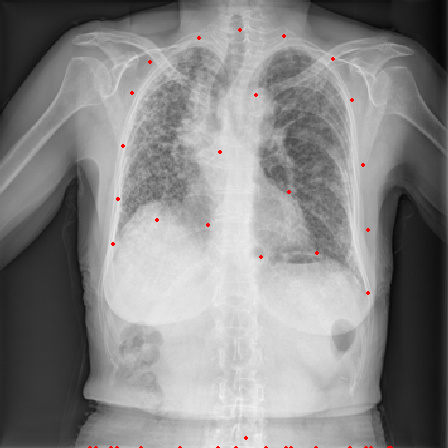


image 1/1 /content/test_data/images/VCX_s0003122_i1_PA.jpg: 448x448 2 quadrupeds, 10.5ms
Speed: 1.0ms preprocess, 10.5ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 448)


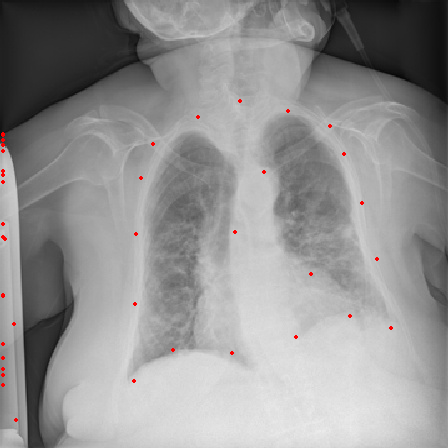

In [ ]:
# Unexpected behaviour
# Model identified 2 sets of lungs on these images

files = ['VCX_s0002077_i2_PA.jpg', 'VCX_s0003122_i1_PA.jpg']

# files = ['VCX_s0003465_i1_PA.jpg', 'VCX_s0000690_i1_PA.jpg',
#          'VCX_s0003260_i1_PA.jpg']

# files = ['VCX_s0004981_i1_PA.jpg']

img_path = '/content/test_data/images'
label_path = '/content/test_data/labels'

for filename in files:
  file_path = os.path.join(img_path, filename)
  img = cv2.imread(file_path)
  height, width = img.shape[:2]

  labels = truth_labels(filename, label_path)[0]

  model = YOLO(model_path)

  results = model(file_path)[0]

  for result in results:
    for keypoint_indx, keypoint in enumerate(result.keypoints.data.tolist()[0]):
      # cv2.putText(img, "*", (int(labels[2*keypoint_indx]*width), int(labels[2*keypoint_indx+1]*height)),
      #             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
      cv2.putText(img, ".", (int(keypoint[0]), int(keypoint[1])),
                  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

  cv2_imshow(img)